Primero Importamos las librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import csv
import requests
import io
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

Ahora vamos a cargar los datos desde nuestro archivo Datos.cvs dentro de nuestro Github

In [2]:
url = 'https://raw.githubusercontent.com/wilo96/Simulacion/master/Datos.csv'
df = pd.read_csv(url)
print(df)

    Ndia          Fecha  Ncasos  Ctotales  Mtotales
0      1  29 de febrero       1         1         0
1      2     1 de marzo       5         6         0
2      3     2 de marzo       0         6         0
3      4     3 de marzo       5        11         0
4      5     4 de marzo       3        14         0
5      6     5 de marzo       0        14         0
6      7     6 de marzo       0        14         0
7      8     7 de marzo       0        14         0
8      9     8 de marzo       1        15         0
9     10     9 de marzo       0        15         0
10    11    10 de marzo       2        17         0
11    12    11 de marzo       0        17         0
12    13    12 de marzo       0        17         0
13    14    13 de marzo       6        23         1
14    15    14 de marzo       5        28         2
15    16    15 de marzo       9        37         2
16    17    16 de marzo      21        58         2
17    18    17 de marzo      53       111         2
18    19    

Filtramos los datos de salia a los que necesidatos que son el dia y el total de infectados

In [3]:
df = df.loc[:,['Ndia','Ctotales']]
print(df)

    Ndia  Ctotales
0      1         1
1      2         6
2      3         6
3      4        11
4      5        14
5      6        14
6      7        14
7      8        14
8      9        15
9     10        15
10    11        17
11    12        17
12    13        17
13    14        23
14    15        28
15    16        37
16    17        58
17    18       111
18    19       155
19    20       260
20    21       367
21    22       532
22    23       789
23    24       981
24    25      1082
25    26      1211
26    27      1403
27    28      1627
28    29      1835
29    30      1924
30    31      1966
31    32      2302
32    33      2758
33    34      3163
34    35      3368
35    36      3465
36    37      3646
37    38      3747


Ahora Implementamos la Prediccion del Modelo Exponencial

In [4]:
x=list(df.iloc[:,0])
y=list(df.iloc[:,1])
def funcion(x,a,b):
    return a*np.exp(b*x)
val=curve_fit( funcion,  x,  y)
print(val)
pred_x = list(range(min(x),max(x)+50))

(array([55.21982087,  0.11487071]), array([[ 1.17306575e+02, -6.12526747e-02],
       [-6.12526747e-02,  3.24950317e-05]]))


Acto seguido graficamos el resultado

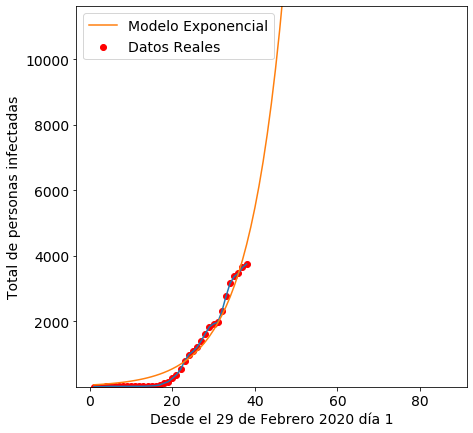

In [5]:
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
plt.scatter(x,y,label="Datos Reales",color="red")
plt.plot(df.loc[:,['Ndia']], df.loc[:,['Ctotales']])
plt.plot(pred_x, [funcion(i,val[0][0],val[0][1]) for i in pred_x], label="Modelo Exponencial" )
plt.legend()
plt.xlabel("Desde el 29 de Febrero 2020 día 1")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1))
plt.show()

Para el Modelo Polinomial vamos a cargar los datos nuevamente y por medio de la regresion polinomial generamos un entrenamiento con los mismos datos para generar una prediccion.

In [6]:
xx= df['Ndia']
yy= df['Ctotales']
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.25)omentar 
X_train=X_train.values.reshape([X_train.values.shape[0],1])
X_test=X_test.values.reshape([X_test.values.shape[0],1])

Ahora vamos a graficar los resultados de la predicción en donde podremos observar como mejora la prediccion de acuerdo a como se aumenta el grado del mpolinomio que va de grado 1 a grado 6

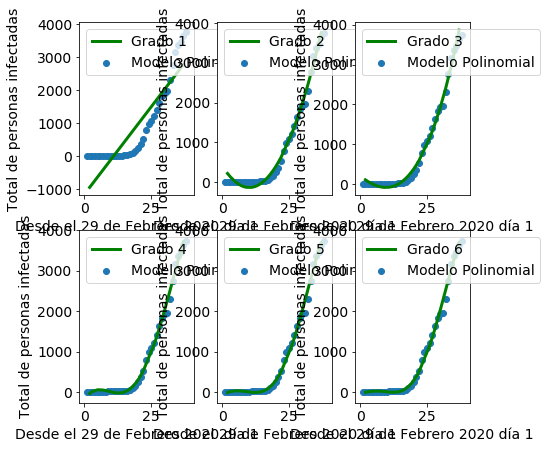

In [7]:
titulos=["Grado 0 ", "Grado 1", "Grado 2", "Grado 3", "Grado 4", "Grado 5", "Grado 6"]
for i in range(1,7):
    
    poli_reg=PolynomialFeatures(degree=i)
    X_train_poli = poli_reg.fit_transform(X_train)
    X_test_p = poli_reg.fit_transform(X_test)
    pr = linear_model.LinearRegression()
    pr.fit(X_train_poli, y_train)
    Y_predic = pr.predict(X_train_poli)
    xt,yt=zip(*sorted(zip(X_train,Y_predic)))
    plt.subplot(2,3,i)
    
    plt.xlabel("Desde el 29 de Febrero 2020 día 1")
    plt.ylabel("Total de personas infectadas")
    plt.plot(xt, yt, color='green', label=titulos[i], lineWidth=3)
    plt.scatter(xx,yy, label="Modelo Polinomial")
    plt.legend(loc=2)
plt.rcParams['figure.figsize'] = [9, 9]
plt.show()

Análisis: 
Con respecto a las dos funciones anteriormente expuestas la mejor para mi parecer es la exponencial debido a que es la que más se acerca a la realidad y la polinomial depende el grado del polinomio para que se acerque pero aun asi presenta ciertas desviaciones.

Conclusion:
En conclusion por medio de las regresiones ya sea polinomiales o expnenciales podemos realizar unas predicciones con respceto a un corpus de datos que nos presentan y de esta manera graficar modelos acercándose a la realidad que en este caso reflejamos la situacion de país.

Análisis político, social y econmómico del país:
Debido a la curva que se presenta del crecimiento del país yo opino que existe mucha desinformación de los pobladores empezando desde los políticos que según se escucha esconden información  y es por ello que las personas actúan cómo si nada pasara, salen de sus casas y toman todo a la lijera sin darse cuenta que si esta curva no baja y continua en crecimiento, las actividades que desempeñamos cada uno no van a ser devueltas a la normalidad por un largo tiempo, causando que la economía del país este estancada y pase mucho tiempo para poder estabilizarse todo de nuevo, se debe generar un acto de conciencia por parte de todos para entender esto y cuidar nuestra salud y de la de todos los demás.